# Breast Cancer Data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.preprocessing import StandardScaler

In [3]:
sns.set_theme()

In [4]:
%matplotlib inline

## Load Data

In [5]:
p_data = pd.read_excel("breast_cancer_data.xlsx")
n_data = p_data.to_numpy()

In [6]:
p_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [7]:
features = n_data[:, :-1]
labels = n_data[:, -1]

## Data Analysis

In [7]:
p_data[:-1]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873,0
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820,0


<AxesSubplot:>

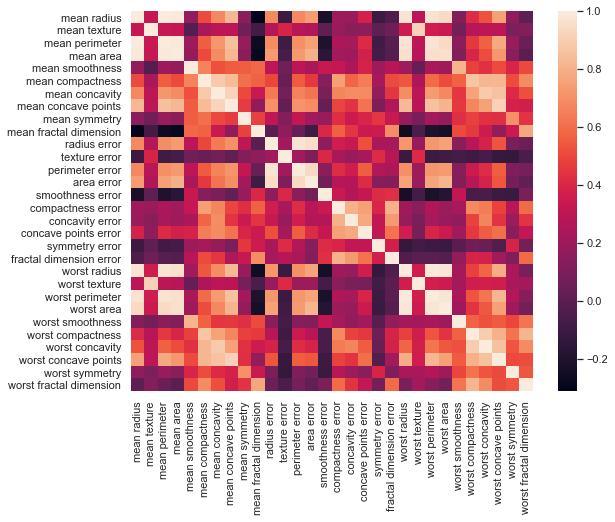

In [8]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(p_data.iloc[:, :-1].corr())

In [ ]:
g = sns.PairGrid(p_data, hue="label")

g.map_diag(sns.histplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)

g.add_legend()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\environment\python\python38\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-1992fdd2972d>", line 5, in <module>
    g.map_lower(sns.kdeplot)
  File "c:\environment\python\python38\lib\site-packages\seaborn\axisgrid.py", line 1281, in map_lower
    self._map_bivariate(func, indices, **kwargs)
  File "c:\environment\python\python38\lib\site-packages\seaborn\axisgrid.py", line 1465, in _map_bivariate
    self._plot_bivariate(x_var, y_var, ax, func, **kws)
  File "c:\environment\python\python38\lib\site-packages\seaborn\axisgrid.py", line 1505, in _plot_bivariate
    func(x=x, y=y, **kwargs)
  File "c:\environment\python\python38\lib\site-packages\seaborn\_decorators.py", line 46, in inner_f
    return f(**kwargs)
  File "c:\environment\python\python38\lib\site-packages\seaborn\distributions.py", line 1740, in kdeplot
    p.plot_bivariate_

TypeError: object of type 'NoneType' has no len()

### PCA

In [8]:
# 标准正态归一化
scaler = StandardScaler()
scaler.fit(features)
x_input = scaler.transform(features)

In [9]:
n_components = 3
pca = PCA(n_components=n_components)
pca.fit(x_input)
x_output = pca.transform(x_input)

In [10]:
print(f"                   explained variance: {pca.explained_variance_}")
print(f"             explained variance ratio: {pca.explained_variance_ratio_}")
print(f"total explained variance ratio of 3st: {np.sum(pca.explained_variance_ratio_)}")

                   explained variance: [13.30499079  5.7013746   2.82291015]
             explained variance ratio: [0.44272026 0.18971182 0.09393163]
total explained variance ratio of 3st: 0.7263637090853792


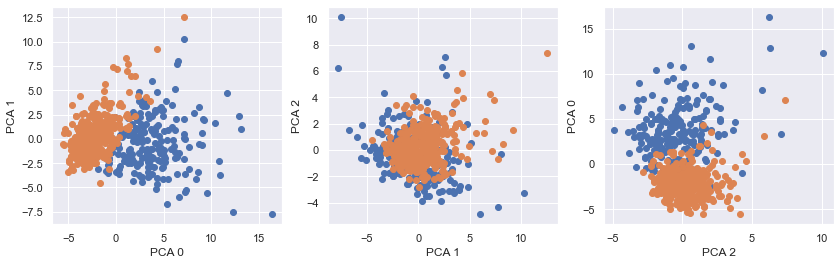

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(14, 4))


def plot_2d_scatter(ax, i, j):
    ax.scatter(
        x_output[labels==0, i], 
        x_output[labels==0, j],
    )
    ax.scatter(
        x_output[labels==1, i], 
        x_output[labels==1, j],
    )
    ax.set_xlabel(f"PCA {i}")
    ax.set_ylabel(f"PCA {j}")


for i, j in [(0, 1), (1, 2), (2, 0)]:
    plot_2d_scatter(axs[i], i, j)
    
plt.savefig("PCA.png", dpi=120)

In [15]:
n_components = 30
pca = PCA(n_components=n_components)
pca.fit(x_input)
x_output = pca.transform(x_input)

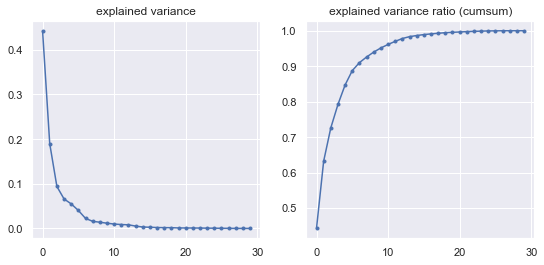

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4))

axs[0].plot(
    range(n_components), 
    pca.explained_variance_ratio_,
    marker="."
)
axs[0].set_title("explained variance")

axs[1].plot(
    range(n_components), 
    np.cumsum(pca.explained_variance_ratio_),
    marker="."
)

axs[1].set_title("explained variance ratio (cumsum)")

plt.savefig("PCA_explained_variance.png", dpi=120)

## Module